In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
N = 4
N2 = N**2
T1 = 20
T2 = 50

In [3]:
A = np.diag([-4] * N2)
diag1 = np.array([1] * (N2 - 1))
diag1[N-1::N] = 0
A += np.diag(diag1, 1)
A += np.diag(diag1, -1)
A += np.diag([1] * (N2 - N), N)
A += np.diag([1] * (N2 - N), -N)

In [4]:
A

array([[-4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, -4,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, -4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, -4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1, -4,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1, -4,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, -4,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, -4,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  1, -4,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1, -4,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -4,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,

In [5]:
C = np.zeros(N2)
C[0] = T1 + T2
C[1:N-1] = T1
C[N-1] = T1 + T1
C[N:N2-N:N] = T2
C[2 * N - 1:N2-N:N] = T1
C[N2-N] = T1 + T2
C[N2-N+1:N2-1] = T1
C[-1] = T1 + T1
C *= -1

In [6]:
C

array([-70., -20., -20., -40., -50.,  -0.,  -0., -20., -50.,  -0.,  -0.,
       -20., -70., -20., -20., -40.])

In [7]:
T = np.linalg.solve(A, C)

In [8]:
T.reshape(N, N).T

array([[33.63636364, 37.84090909, 37.84090909, 33.63636364],
       [26.70454545, 29.88636364, 29.88636364, 26.70454545],
       [23.29545455, 25.11363636, 25.11363636, 23.29545455],
       [21.36363636, 22.15909091, 22.15909091, 21.36363636]])

In [9]:
Tfull = T1 * np.ones([N + 2, N + 2])
Tfull[0,:] = T2
Tfull[1:-1,1:-1] = T.reshape(N, N).T

In [10]:
Tfull

array([[50.        , 50.        , 50.        , 50.        , 50.        ,
        50.        ],
       [20.        , 33.63636364, 37.84090909, 37.84090909, 33.63636364,
        20.        ],
       [20.        , 26.70454545, 29.88636364, 29.88636364, 26.70454545,
        20.        ],
       [20.        , 23.29545455, 25.11363636, 25.11363636, 23.29545455,
        20.        ],
       [20.        , 21.36363636, 22.15909091, 22.15909091, 21.36363636,
        20.        ],
       [20.        , 20.        , 20.        , 20.        , 20.        ,
        20.        ]])

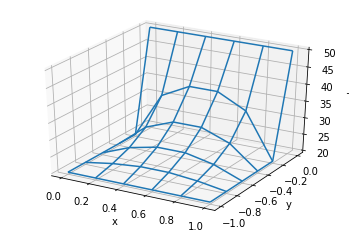

In [11]:
x = np.linspace(0, 1, N + 2)
y = np.array(x)
X, Y = np.meshgrid(x, y)
stride = int((N + 2) / 6)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, -Y, Tfull, rstride=stride, cstride=stride)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("T");